In [4]:
pip install matplotlib

     -------------------------------------- 10.4/10.4 MB 622.3 kB/s eta 0:00:00
     -------------------------------------- 499.4/499.4 kB 3.5 MB/s eta 0:00:00
     ---------------------------------------- 14.8/14.8 MB 2.1 MB/s eta 0:00:00



[notice] A new release of pip available: 22.2.1 -> 23.0
[notice] To update, run: python.exe -m pip install --upgrade pip


     ---------------------------------------- 7.2/7.2 MB 4.8 MB/s eta 0:00:00
     ---------------------------------------- 55.3/55.3 kB 2.8 MB/s eta 0:00:00
     -------------------------------------- 163.0/163.0 kB 4.9 MB/s eta 0:00:00
     -------------------------------------- 965.4/965.4 kB 4.7 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.2.1 -> 23.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [5]:
pip install pandas

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.2.1 -> 23.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [12]:
pip install -U scikit-learn

     ---------------------------------------- 8.3/8.3 MB 5.4 MB/s eta 0:00:00
     -------------------------------------- 298.0/298.0 kB 6.1 MB/s eta 0:00:00
     ---------------------------------------- 42.5/42.5 MB 5.5 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.2.1 -> 23.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [14]:
pip install seaborn

     -------------------------------------- 293.3/293.3 kB 6.0 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.2.1 -> 23.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [15]:
pip install nltk

Note: you may need to restart the kernel to use updated packages.Collecting nltk
     ---------------------------------------- 1.5/1.5 MB 5.3 MB/s eta 0:00:00
     -------------------------------------- 267.7/267.7 kB 8.3 MB/s eta 0:00:00
  Using cached tqdm-4.64.1-py2.py3-none-any.whl (78 kB)




[notice] A new release of pip available: 22.2.1 -> 23.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [16]:
#Importing all the required libraries
import pandas as pd
import csv
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import seaborn as sns
from nltk.stem import PorterStemmer

In [18]:
from zipfile import ZipFile
with ZipFile('smsspamcollection.zip') as z:
    z.extractall()

In [19]:
#reading the sms
with open('SMSSpamCollection', 'r') as f:
    msg = f.readlines()
print(len(msg))

5574


In [20]:
#converting the list of messages into a dataframe
msg_df = pd.read_csv("SMSSpamCollection", sep='\t',names =['Label','Message'])
msg_df.head()

Label                                            Message
0   ham  Go until jurong point, crazy.. Available only ...
1   ham                      Ok lar... Joking wif u oni...
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...
3   ham  U dun say so early hor... U c already then say...
4   ham  Nah I don't think he goes to usf, he lives aro...

In [21]:
msg_df.to_csv('raw_data.csv')

<AxesSubplot: xlabel='Label', ylabel='count'>

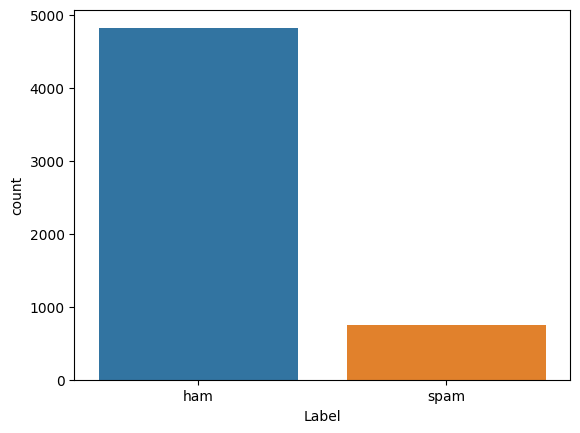

In [22]:
#looking at the imbalanced data
sns.countplot(x="Label", data=msg_df)

In [23]:
#Creating a column for the length of messages
msg_len =[]
for i in range(len(msg_df)):
    msg_len.append(len(msg_df['Message'][i]))
msg_df['Message_Length'] = msg_len

msg_df.Label.replace("spam", 1, inplace=True)
msg_df.Label.replace("ham", 0, inplace=True)

In [24]:
msg_df.head()

Label                                            Message  Message_Length
0      0  Go until jurong point, crazy.. Available only ...             111
1      0                      Ok lar... Joking wif u oni...              29
2      1  Free entry in 2 a wkly comp to win FA Cup fina...             155
3      0  U dun say so early hor... U c already then say...              49
4      0  Nah I don't think he goes to usf, he lives aro...              61

In [25]:
#statistics about the length of messages
msg_df.groupby('Label').describe()

Message_Length                                                         
               count        mean        std   min    25%    50%    75%    max
Label                                                                        
0             4825.0   71.482487  58.440652   2.0   33.0   52.0   93.0  910.0
1              747.0  138.670683  28.873603  13.0  133.0  149.0  157.0  223.0

array([<AxesSubplot: title={'center': '0'}>,
       <AxesSubplot: title={'center': '1'}>], dtype=object)

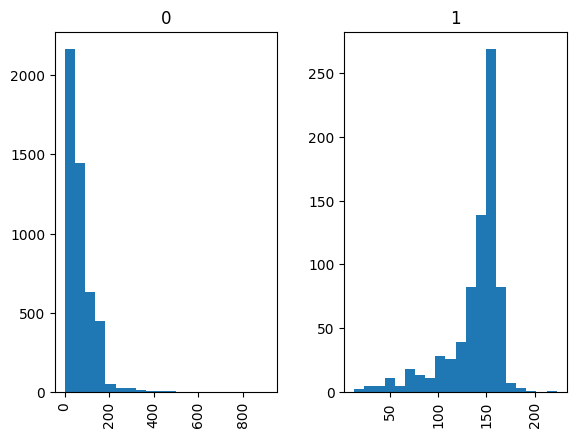

In [26]:
#Plotting the varied length of sentences
msg_df.hist(column='Message_Length', by='Label', bins=20)

In [27]:
#splitting the data into train, validate and test data
X_train, X_test, y_train, y_test = train_test_split(msg_df['Message'], msg_df['Label'], test_size=0.2, random_state=1)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=1)

In [11]:
#creating and saving a dataframe of train data
train_dict = {'Message': X_train, "Label": y_train}
train_df = pd.DataFrame(train_dict)
train_df.to_csv('train.csv')

In [12]:
#creating and saving a dataframe of validation data
val_dict = {'Message': X_val, "Label": y_val}
val_df = pd.DataFrame(val_dict)
val_df.to_csv('validation.csv')

In [13]:
#creating and saving a dataframe of test data
test_dict = {'Message': X_test, "Label": y_test}
test_df = pd.DataFrame(test_dict)
test_df.to_csv('test.csv')